### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

### Sample dataset (monthly sales)

In [2]:
data = {
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 250, 230, 240, 260, 300, 310, 330, 320, 340, 360]
}

df = pd.DataFrame(data)
print(df)

        Month  Sales
0  2023-01-31    200
1  2023-02-28    220
2  2023-03-31    250
3  2023-04-30    230
4  2023-05-31    240
5  2023-06-30    260
6  2023-07-31    300
7  2023-08-31    310
8  2023-09-30    330
9  2023-10-31    320
10 2023-11-30    340
11 2023-12-31    360


C:\Users\priya\AppData\Local\Temp\ipykernel_22112\3078269532.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),


### Check for missing values

In [3]:
print(df.isnull().sum())

Month    0
Sales    0
dtype: int64


### Visualize sales over time

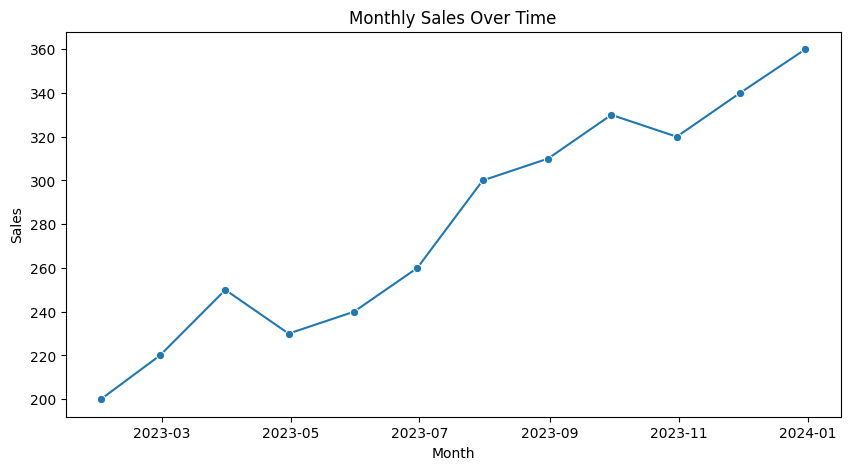

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Sales', data=df, marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Prepare data for regression

In [7]:
# Convert Month to numeric (month index)
df['MonthIndex'] = np.arange(len(df))
print(df.head())

X = df[['MonthIndex']]  # feature
y = df['Sales']         # target

       Month  Sales  MonthIndex
0 2023-01-31    200           0
1 2023-02-28    220           1
2 2023-03-31    250           2
3 2023-04-30    230           3
4 2023-05-31    240           4


### Create regression plot

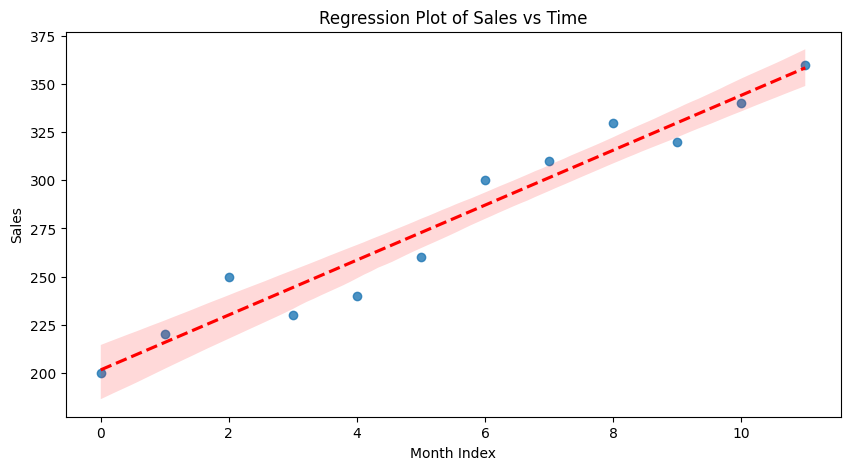

In [6]:
plt.figure(figsize=(10,5))
sns.regplot(x='MonthIndex', y='Sales', data=df, line_kws={"color":"red","linestyle":"--"})
plt.title("Regression Plot of Sales vs Time")
plt.xlabel("Month Index")
plt.ylabel("Sales")
plt.show()

### Residual plot

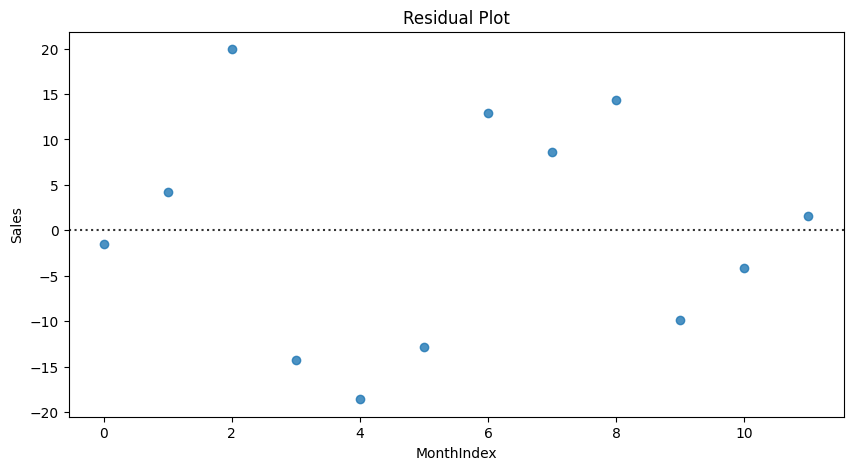

In [8]:
plt.figure(figsize=(10,5))
sns.residplot(x='MonthIndex', y='Sales', data=df)
plt.title("Residual Plot")
plt.show()

### Fit linear regression model

In [9]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluate model

In [10]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 141.49
R-squared: 0.94


###  Predict future sales (next 6 months)

In [11]:
future_index = np.arange(len(df), len(df)+6).reshape(-1,1)
future_sales = model.predict(future_index)

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Visualize historical + predicted sales

C:\Users\priya\AppData\Local\Temp\ipykernel_22112\2970328168.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=df['Month'].iloc[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')


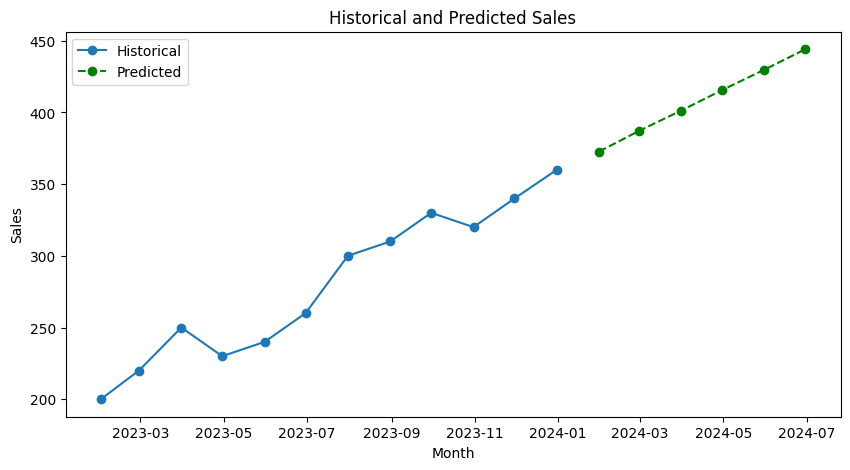

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df['Month'], df['Sales'], marker='o', label='Historical')
future_months = pd.date_range(start=df['Month'].iloc[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')
plt.plot(future_months, future_sales, marker='o', linestyle='--', color='green', label='Predicted')
plt.title("Historical and Predicted Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

### Check for trend

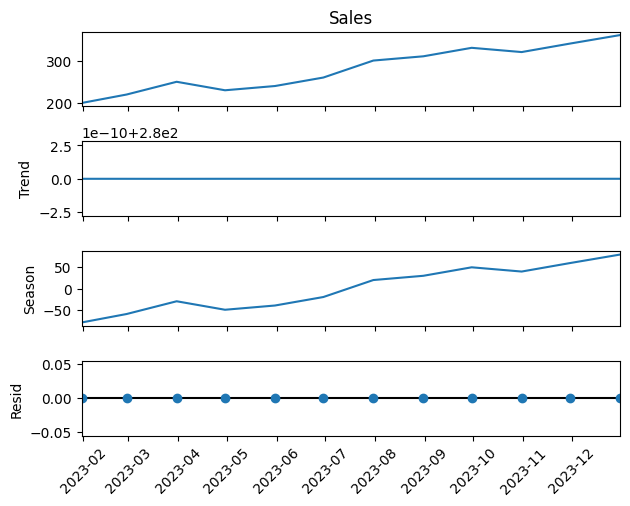

In [15]:
from statsmodels.tsa.seasonal import STL

# STL decomposition works with fewer data points
stl = STL(df_ts['Sales'], period=12, robust=True)
result = stl.fit()
result.plot()
plt.xticks(rotation=45)
plt.show()